### Importação dos dados



In [401]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image
pio.renderers.default = 'svg'
pio.templates.default = 'plotly_white'

pio.kaleido.scope.default_format = 'svg'


# Instale essa biblioteca para que os graficos fiquem estaticos para salvar no Github
#!pip install --upgrade kaleido

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

pd.options.display.float_format = '{:,.2f}'.format

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,"1,009.99",54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [402]:
# Adicionando colunas como identicador para cada loja
loja['loja'] = 'loja1'
loja2['loja'] = 'loja2'
loja3['loja'] = 'loja3'
loja4['loja'] = 'loja4'

In [403]:
# Concatenando os dataframes
dados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
dados.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1
3,Micro-ondas,eletrodomesticos,"1,009.99",54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1


# 1. Análise do faturamento


In [404]:
faturamento_total_loja = dados.groupby('loja')['Preço'].sum().reset_index()
faturamento_total_loja.rename(columns={'Preço': 'Faturamento'}, inplace=True)
print(faturamento_total_loja)

    loja  Faturamento
0  loja1 1,534,509.12
1  loja2 1,488,459.06
2  loja3 1,464,025.03
3  loja4 1,384,497.58


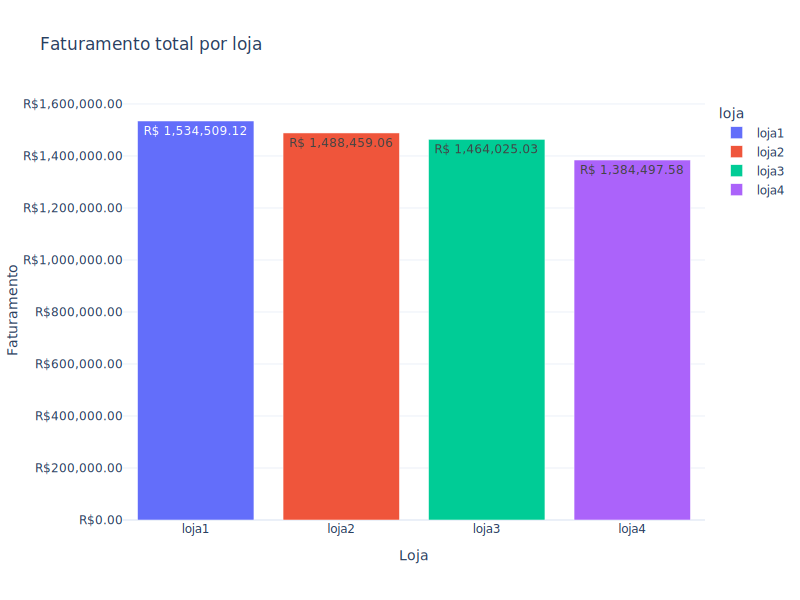

In [405]:
fig_faturamento_total_loja = px.bar(faturamento_total_loja,
       x='loja',
       y='Faturamento',
       title='Faturamento total por loja',
       color='loja',
       width=800,
       height=600)
fig_faturamento_total_loja.update_layout(xaxis_title='Loja', yaxis_title='Faturamento')
fig_faturamento_total_loja.update_traces(texttemplate='R$ %{y:,.2f}', textposition='inside')
fig_faturamento_total_loja.update_yaxes(tickformat=',.2f', tickprefix='R$')
fig_faturamento_total_loja.show()

# 2. Vendas por Categoria


In [406]:
venda_por_categoria_loja = dados.groupby('loja')['Categoria do Produto'].value_counts().reset_index(name='Quantidade')
print(venda_por_categoria_loja)

     loja   Categoria do Produto  Quantidade
0   loja1                 moveis         465
1   loja1            eletronicos         448
2   loja1             brinquedos         324
3   loja1       eletrodomesticos         312
4   loja1        esporte e lazer         284
5   loja1  instrumentos musicais         182
6   loja1                 livros         173
7   loja1  utilidades domesticas         171
8   loja2                 moveis         442
9   loja2            eletronicos         422
10  loja2             brinquedos         313
11  loja2       eletrodomesticos         305
12  loja2        esporte e lazer         275
13  loja2  instrumentos musicais         224
14  loja2                 livros         197
15  loja2  utilidades domesticas         181
16  loja3                 moveis         499
17  loja3            eletronicos         451
18  loja3             brinquedos         315
19  loja3       eletrodomesticos         278
20  loja3        esporte e lazer         277
21  loja3 

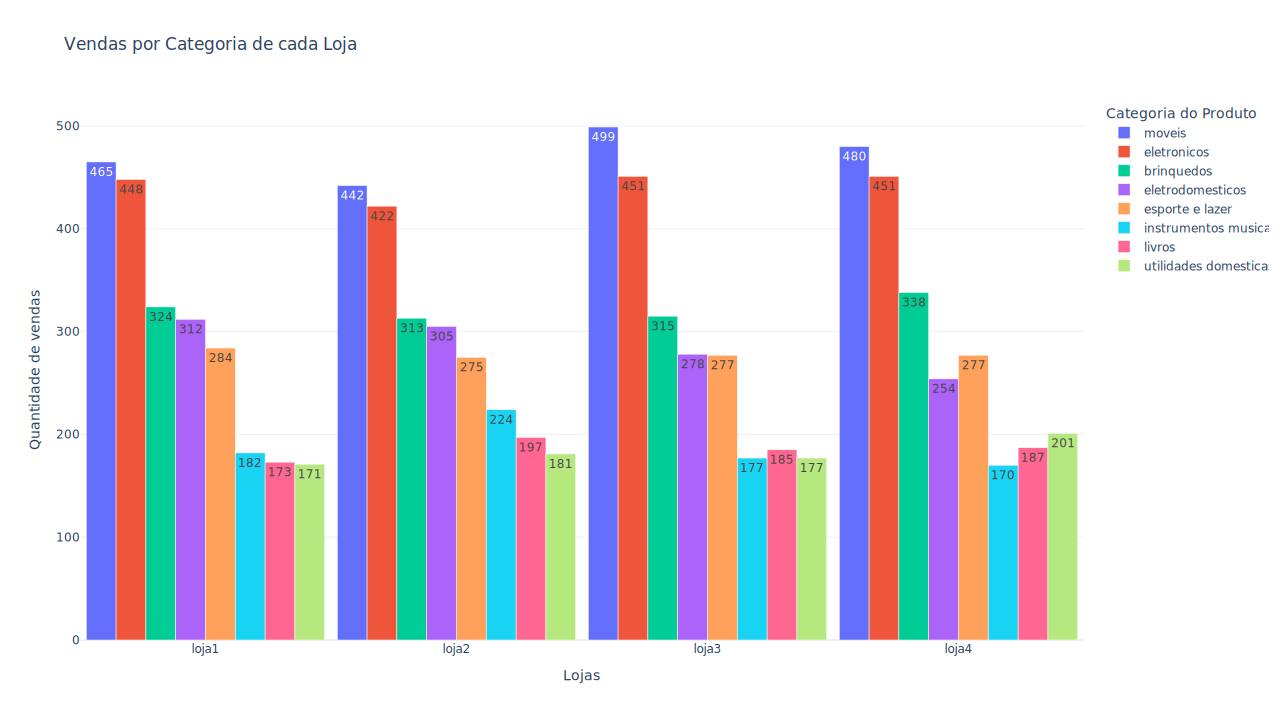

In [407]:
fig_venda_por_categoria = px.bar(venda_por_categoria_loja,
       x='loja',
       y='Quantidade',
       color='Categoria do Produto',
       barmode='group',
       title='Vendas por Categoria de cada Loja',
       width=1280,
       height=720)

fig_venda_por_categoria.update_layout(xaxis_title='Lojas', yaxis_title='Quantidade de vendas', bargap=0.05,bargroupgap=0.0)
fig_venda_por_categoria.update_traces(texttemplate='%{y}', textposition='inside')
fig_venda_por_categoria.show()

# 3. Média de Avaliação das Lojas

In [408]:
loja1_avaliacao = dados[dados['loja'] == 'loja1']['Avaliação da compra'].value_counts().sort_values(ascending=True)
loja2_avaliacao = dados[dados['loja'] == 'loja2']['Avaliação da compra'].value_counts().sort_values(ascending=True)
loja3_avaliacao = dados[dados['loja'] == 'loja3']['Avaliação da compra'].value_counts().sort_values(ascending=True)
loja4_avaliacao = dados[dados['loja'] == 'loja4']['Avaliação da compra'].value_counts().sort_values(ascending=True)

print(loja1_avaliacao)
print(loja2_avaliacao)
print(loja3_avaliacao)
print(loja4_avaliacao)

Avaliação da compra
2      86
3     218
1     319
4     444
5    1292
Name: count, dtype: int64
Avaliação da compra
2      93
3     209
1     273
4     482
5    1302
Name: count, dtype: int64
Avaliação da compra
2      79
3     193
1     297
4     434
5    1356
Name: count, dtype: int64
Avaliação da compra
2      85
3     210
1     310
4     453
5    1300
Name: count, dtype: int64


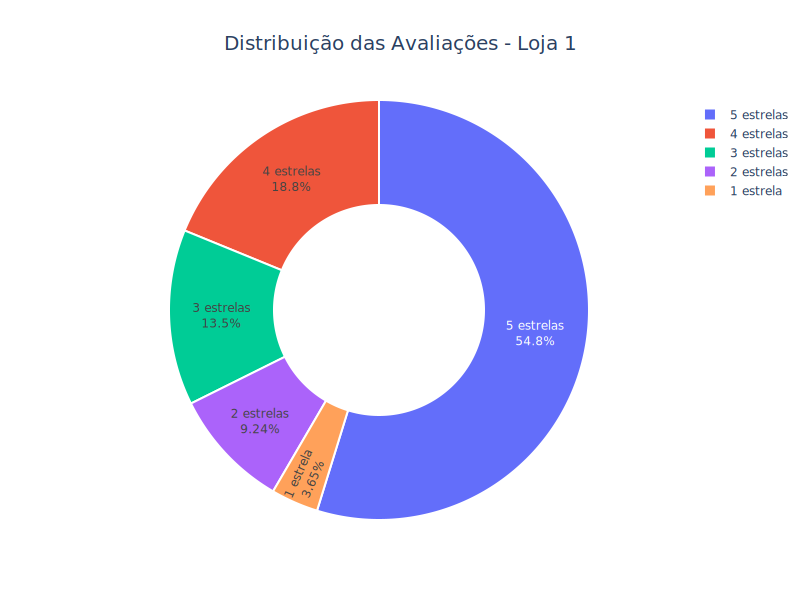

In [409]:
loja1_avaliacao.index = ['1 estrela', '2 estrelas', '3 estrelas', '4 estrelas', '5 estrelas']

fig_avaliacao_loja1 = px.pie(
    loja1_avaliacao,
    values=loja1_avaliacao.values,
    names=loja1_avaliacao.index,
    title='Distribuição das Avaliações - Loja 1',
    hole=0.5,
    width=800,
    height=600,
)

fig_avaliacao_loja1.update_traces(
    textinfo='percent+label',
    textposition='inside',
    textfont=dict(size=12),
    marker=dict(line=dict(color='white', width=2))
)

fig_avaliacao_loja1.update_layout(
    title={
        'text': 'Distribuição das Avaliações - Loja 1',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    }
)

fig_avaliacao_loja1.show()


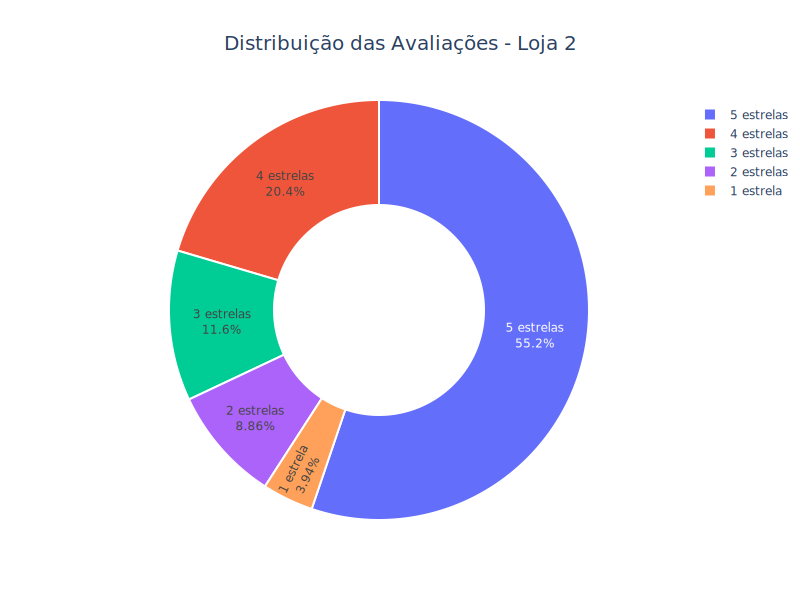

In [410]:
loja2_avaliacao.index = ['1 estrela', '2 estrelas', '3 estrelas', '4 estrelas', '5 estrelas']

fig_avaliacao_loja2 = px.pie(
    loja2_avaliacao,
    values=loja2_avaliacao.values,
    names=loja2_avaliacao.index,
    title='Distribuição das Avaliações - Loja 2',
    hole=0.5,
    width=800,
    height=600,
)

fig_avaliacao_loja2.update_traces(
    textinfo='percent+label',
    textposition='inside',
    textfont=dict(size=12),
    marker=dict(line=dict(color='white', width=2))
)

fig_avaliacao_loja2.update_layout(
    title={
        'text': 'Distribuição das Avaliações - Loja 2',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    }
)

fig_avaliacao_loja2.show()

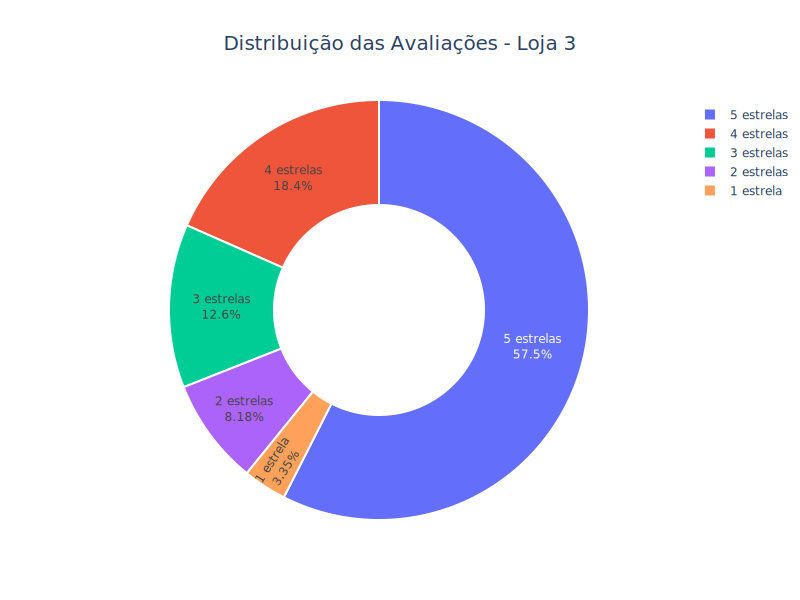

In [411]:
loja3_avaliacao.index = ['1 estrela', '2 estrelas', '3 estrelas', '4 estrelas', '5 estrelas']

fig_avaliacao_loja3 = px.pie(
    loja1_avaliacao,
    values=loja3_avaliacao.values,
    names=loja3_avaliacao.index,
    title='Distribuição das Avaliações - Loja 3',
    hole=0.5,
    width=800,
    height=600,
)

fig_avaliacao_loja3.update_traces(
    textinfo='percent+label',
    textposition='inside',
    textfont=dict(size=12),
    marker=dict(line=dict(color='white', width=2))
)

fig_avaliacao_loja3.update_layout(
    title={
        'text': 'Distribuição das Avaliações - Loja 3',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    }
)

fig_avaliacao_loja3.show()

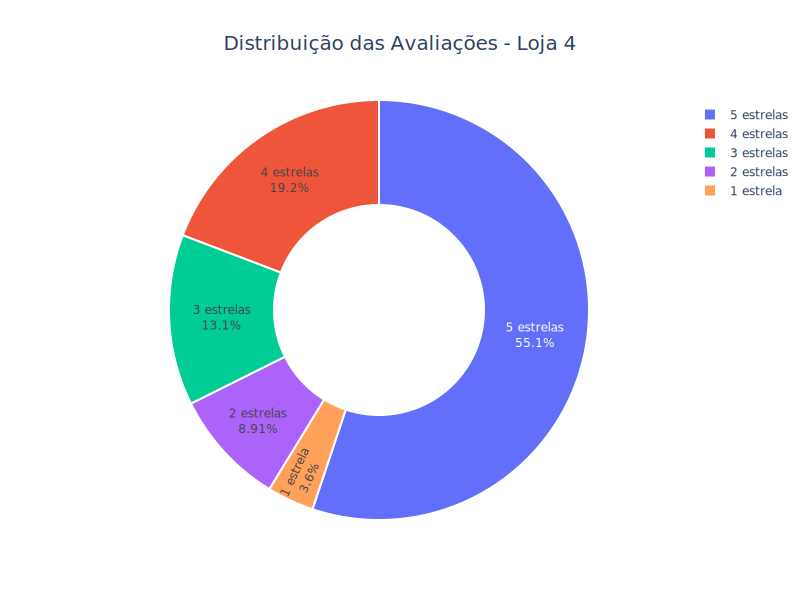

In [412]:
loja4_avaliacao.index = ['1 estrela', '2 estrelas', '3 estrelas', '4 estrelas', '5 estrelas']

fig_avaliacao_loja4 = px.pie(
    loja4_avaliacao,
    values=loja4_avaliacao.values,
    names=loja4_avaliacao.index,
    title='Distribuição das Avaliações - Loja 4',
    hole=0.5,
    width=800,
    height=600,
)

fig_avaliacao_loja4.update_traces(
    textinfo='percent+label',
    textposition='inside',
    textfont=dict(size=12),
    marker=dict(line=dict(color='white', width=2))
)

fig_avaliacao_loja4.update_layout(
    title={
        'text': 'Distribuição das Avaliações - Loja 4',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    }
)

fig_avaliacao_loja4.show()

In [413]:
media_avaliacao_loja = dados.groupby('loja')['Avaliação da compra'].mean().reset_index().sort_values('Avaliação da compra', ascending=True)
media_avaliacao_loja.rename(columns={'Avaliação da compra': 'Média de Avaliação'}, inplace=True)
print(media_avaliacao_loja)

    loja  Média de Avaliação
0  loja1                3.98
3  loja4                4.00
1  loja2                4.04
2  loja3                4.05


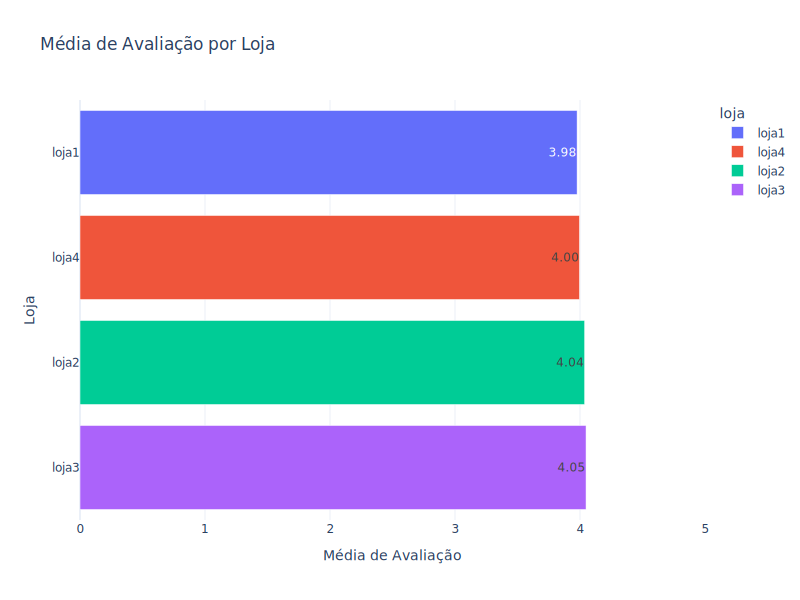

In [414]:
fig_media_avaliacao_loja = px.bar(media_avaliacao_loja,
             x='Média de Avaliação',
             y='loja',
             text='Média de Avaliação',
             title='Média de Avaliação por Loja',
             color='loja',
             range_x=[0, 5],
             width=800,
             height=600)
fig_media_avaliacao_loja.update_traces(texttemplate='%{x:.2f}', textposition='inside')
fig_media_avaliacao_loja.update_layout(xaxis_title='Média de Avaliação',
                  yaxis_title='Loja',
                  uniformtext_minsize=8,
                  uniformtext_mode='hide')

fig_media_avaliacao_loja.show()


# 4. Produtos Mais e Menos Vendidos

In [415]:
produtos_mais_vendidos_loja = dados.groupby('loja')['Produto'].value_counts().reset_index(name='Quantidade')
produtos_mais_vendidos_loja = produtos_mais_vendidos_loja.sort_values(['loja', 'Quantidade'], ascending=[True, False]).groupby('loja').head(3)
print(produtos_mais_vendidos_loja)

      loja                   Produto  Quantidade
0    loja1             Guarda roupas          60
1    loja1               Micro-ondas          60
2    loja1             TV Led UHD 4K          60
51   loja2  Iniciando em programação          65
52   loja2               Micro-ondas          62
53   loja2                   Bateria          61
102  loja3             Kit banquetas          57
103  loja3                 Cama king          56
104  loja3            Mesa de jantar          56
153  loja4                  Cama box          62
154  loja4                  Faqueiro          59
155  loja4                 Cama king          56


In [416]:
produtos_menos_vendidos_loja = dados.groupby('loja')['Produto'].value_counts().reset_index(name='Quantidade')
produtos_menos_vendidos_loja = produtos_menos_vendidos_loja.sort_values(['loja', 'Quantidade'], ascending=[True, True]).groupby('loja').head(3)
print(produtos_menos_vendidos_loja)

      loja            Produto  Quantidade
49   loja1       Celular ABXY          33
50   loja1            Headset          33
48   loja1  Panela de pressão          35
101  loja2  Jogo de tabuleiro          32
99   loja2         Impressora          34
100  loja2     Mesa de jantar          34
152  loja3   Blocos de montar          35
149  loja3      Jogo de copos          36
150  loja3        Micro-ondas          36
203  loja4           Guitarra          33
202  loja4      Guarda roupas          34
201  loja4             Violão          37


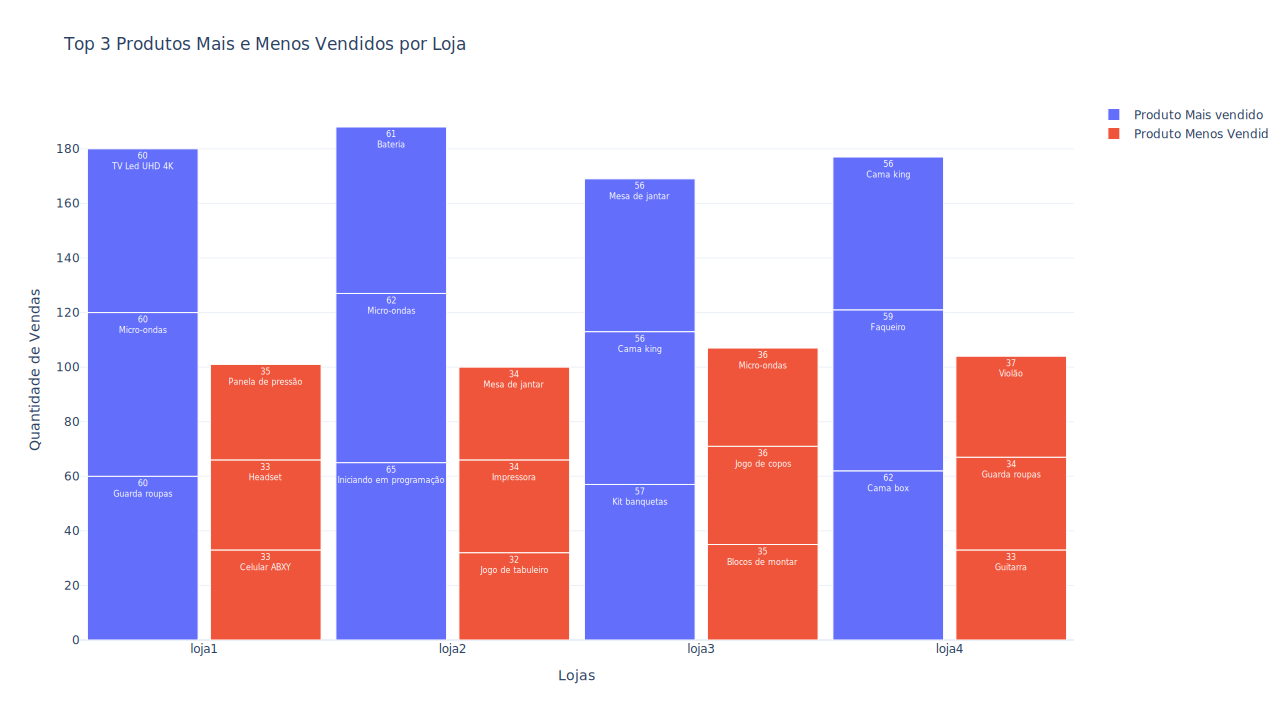

In [417]:

fig_produto_mais_vendido = go.Figure()
fig_produto_mais_vendido.add_trace(go.Bar(
    x=produtos_mais_vendidos_loja['loja'],
    y=produtos_mais_vendidos_loja['Quantidade'],
    name='Produto Mais vendido',
    text=produtos_mais_vendidos_loja['Produto'],
    textfont=dict(size=8, color='white'),
    marker=dict(line=dict(color='white', width=1)),
    texttemplate='%{y}<br>%{text}',
))

fig_produto_mais_vendido.add_trace(go.Bar(
    x=produtos_menos_vendidos_loja['loja'],
    y=produtos_menos_vendidos_loja['Quantidade'],
    name='Produto Menos Vendido',
    text=produtos_menos_vendidos_loja['Produto'],
    textfont=dict(size=8, color='white'),
    marker=dict(line=dict(color='white', width=1)),
    texttemplate='%{y}<br>%{text}',
))

fig_produto_mais_vendido.update_layout(
    title='Top 3 Produtos Mais e Menos Vendidos por Loja',
    xaxis_title='Lojas',
    yaxis_title='Quantidade de Vendas',
    barmode='group',
    bargap=0.01,
    bargroupgap=0.1,
    width=1280,
    height=720
)

fig_produto_mais_vendido.show()


# 5. Frete Médio por Loja


In [418]:
valor_frete_medio_loja = dados.groupby('loja')['Frete'].mean().reset_index()
valor_frete_medio_loja.rename(columns={'Frete': 'Frete Médio'}, inplace=True)
print(valor_frete_medio_loja)

    loja  Frete Médio
0  loja1        34.69
1  loja2        33.62
2  loja3        33.07
3  loja4        31.28


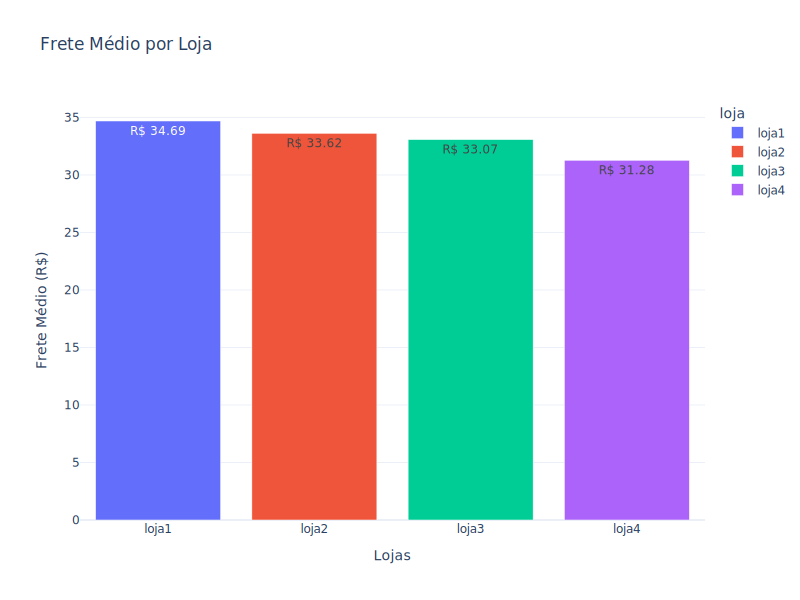

In [419]:
fig_frete_medio_loja = px.bar(valor_frete_medio_loja,
             x='loja',
             y='Frete Médio',
             text='Frete Médio',
             title='Frete Médio por Loja',
             color='loja',
             width=800,
             height=600)
fig_frete_medio_loja.update_traces(texttemplate='R$ %{y:.2f}', textposition='inside')
fig_frete_medio_loja.update_layout(xaxis_title='Lojas',
                  yaxis_title='Frete Médio (R$)',
                  uniformtext_minsize=8,
                  uniformtext_mode='hide')

fig_frete_medio_loja.show()

# Relatório Final - Alura Store 💡

Análise de vendas da **Alura Store**! 🎉 O objetivo aqui é ajudar o **Sr. João** a decidir qual das quatro lojas (loja1, loja2, loja3 ou loja4) ele deve vender para investir em um novo negócio. Usamos os dados do notebook `AluraStoreBr.ipynb` pra mergulhar fundo nas métricas de **média de avaliação**, **produtos mais e menos vendidos**, **frete médio** e **faturamento total**. Bora conferir os highlights e a recomendação? 🚀

---

## Objetivo da Análise? 🔍

Analisamos os dados de vendas das quatro lojas pra entender o desempenho de cada uma. Com base em indicadores como satisfação do cliente, faturamento e eficiência logística, chegamos a uma recomendação sobre qual loja vender. Tudo isso pra garantir que o Sr. João tome uma decisão baseada em dados.

---

## Resumo dos Indicadores 📊

A tabela abaixo apresenta os principais indicadores de desempenho de cada loja, incluindo média de avaliação, produtos mais e menos vendidos, frete médio e faturamento total (calculado como a soma da coluna `Preço` por loja, sem incluir o frete).

| **Loja** | **Média de Avaliação** 🌟 | **Produtos Mais Vendidos (Qtd)** 🏆 | **Produtos Menos Vendidos (Qtd)** 😴 | **Frete Médio (R$)** 💸 | **Faturamento Total (R$)** 💰 |
| --- | --- | --- | --- | --- | --- |
| **Loja1** | Menor média 😕 | Guarda-roupas (60), Micro-ondas (60), TV Led UHD 4K (60) | Celular ABXY (33), Headset (33), Panela de pressão (35) | 34,69 (maior) | 1.475.729,37 |
| **Loja2** | Intermediária 😊 | Iniciando em programação (65), Micro-ondas (62), Bateria (61) | Jogo de tabuleiro (32), Impressora (34), Mesa de jantar (34) | 33,62 | 1.540.377,78 |
| **Loja3** | Maior média 🎉 | Kit banquetas (57), Cama king (56), Mesa de jantar (56) | Blocos de montar (35), Jogo de copos (36), Micro-ondas (36) | 33,07 | 1.482.463,28 |
| **Loja4** | Intermediária 😊 | Cama box (62), Faqueiro (59), Cama king (56) | Guitarra (33), Guarda roupas (34), Violão (37) | 31,28 (menor) | 1.509.999,27 |

## Análise Detalhada por Loja 🕵️‍♂️

### **Loja1: Desafios Operacionais 😕**

- **Pontos Fracos**:
  - Menor média de avaliação, indicando baixa satisfação dos clientes, possivelmente devido a questões de qualidade, atendimento ou logística.
  - Frete médio mais alto (R$ 34,69), reduzindo a competitividade no mercado de e-commerce.
  - Menor faturamento total (R$ 1.475.729,37), sugerindo desempenho financeiro inferior.
- **Pontos Fortes**:
  - Boa demanda por produtos de alto valor, como "Guarda roupas" e "TV Led UHD 4K" (60 unidades cada).
- **Conclusão**: A loja1 apresenta os maiores desafios, exigindo investimentos significativos para melhorar a experiência do cliente e a eficiência logística. É a principal candidata à venda.

### **Loja2: Potencial de Nicho 📚**

- **Pontos Fortes**:
  - Maior faturamento total (R$ 1.540.377,78), impulsionado por produtos como "Iniciando em programação" (65 unidades), que sugere um nicho de mercado promissor.
  - Média de avaliação intermediária, indicando espaço para melhorias, mas sem problemas críticos.
- **Pontos Fracos**:
  - Frete médio relativamente alto (R$ 33,62), inferior apenas à loja1.
  - Produtos menos vendidos, como "Jogo de tabuleiro" (32 unidades), podem indicar baixa demanda em certas categorias.
- **Conclusão**: A loja2 é um ativo valioso devido ao seu desempenho financeiro e potencial de inovação. Recomenda-se sua manutenção.

### **Loja3: Excelência em Satisfação 🎉**

- **Pontos Fortes**:
  - Maior média de avaliação, refletindo alta satisfação dos clientes, possivelmente devido a um atendimento ou logística superiores.
  - Faturamento sólido (R$ 1.482.463,28), próximo ao da loja2.
  - Frete médio competitivo (R$ 33,07), melhor que loja1 e loja2.
- **Pontos Fracos**:
  - Alguns produtos, como "Blocos de montar" (35 unidades), apresentam vendas limitadas.
- **Conclusão**: A loja3 destaca-se pelo equilíbrio entre satisfação do cliente e desempenho financeiro, sendo uma candidata forte para manutenção.

### **Loja4: Eficiência Logística 😎**

- **Pontos Fortes**:
  - Menor frete médio (R$ 31,28), um diferencial competitivo que atrai clientes sensíveis a custos.
  - Segundo maior faturamento (R$ 1.509.999,27), impulsionado por produtos como "Cama box" (62 unidades).
- **Pontos Fracos**:
  - Produtos menos vendidos, como "Guitarra" (33 unidades), sugerem necessidade de otimização do portfólio.
- **Conclusão**: A loja4 combina eficiência logística com bom desempenho financeiro, sendo altamente recomendada para manutenção.

---

## Recomendação Estratégica: Venda da Loja1 🚪💸

Com base na análise, recomendamos a **venda da loja1** pelos seguintes motivos:

- **Baixa satisfação do cliente**: A menor média de avaliação indica problemas na experiência do cliente, que podem prejudicar a reputação e a fidelidade.
- **Custo logístico elevado**: O frete médio de R$ 34,69 é o mais alto, comprometendo a competitividade no e-commerce.
- **Menor desempenho financeiro**: O faturamento de R$ 1.475.729,37 é o mais baixo, sugerindo menor retorno sobre o investimento.
- **Custo de melhoria**: Corrigir os desafios operacionais (satisfação e logística) demandaria recursos significativos, enquanto a venda libera capital para um novo empreendimento.

**Justificativa para manter as demais lojas**:

- **Loja2**: O maior faturamento e o sucesso de produtos de nicho (ex.: "Iniciando em programação") indicam alto potencial de crescimento. 📈
- **Loja3**: A liderança em satisfação do cliente e o faturamento sólido a tornam um ativo estratégico. 😊
- **Loja4**: O frete mais baixo e o forte desempenho financeiro garantem eficiência e rentabilidade. 🤑

---

## Estratégias para as Lojas Mantidas 🚀

Para maximizar o desempenho das lojas2, loja3 e loja4, propomos as seguintes ações:

1. **Loja2**:
   - Expandir produtos de nicho, como cursos online, para outras lojas, avaliando a demanda regional. 📚
   - Negociar parcerias logísticas para reduzir o frete médio, aproximando-o do nível da loja4. 🚚
2. **Loja3**:
   - Capitalizar a alta satisfação com campanhas de marketing que reforcem a confiança dos clientes. 🌟
   - Otimizar o portfólio, reduzindo itens de baixa demanda, como "Blocos de montar". 🧹
3. **Loja4**:
   - Destacar o frete competitivo em campanhas promocionais para atrair mais clientes. 🛍️
   - Testar produtos populares de outras lojas, como "Kit banquetas" da loja3, para diversificar as vendas. 🛋️

---

## Conclusão 🎯

Com base nesta análise a **loja1** é a candidata ideal para venda, devido à baixa satisfação do cliente, frete elevado e menor faturamento. Essa decisão permitirá liberar capital para um novo empreendimento, enquanto as **loja2**, **loja3** e **loja4** são mantidas por seu desempenho superior e potencial de crescimento. 💼